**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [6]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [7]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [8]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [9]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [10]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [11]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [12]:
# With your own prompt, run it with the same model as the example (gemini-2.5-flash-lite).
input_prompt = ["What is the difference between the input embedding mechanism of the original Transformer and the input embedding of BERT?" ]
text_response1, logs = prompt_gemini(input_prompt=input_prompt, with_tokens_info=True)
print("\nToken usage log:", logs)  
print("========================================================================================================")
display(Markdown(text_response1))   


Token usage log: {'model': 'gemini-2.5-flash-lite', 'input_tokens': 27, 'output_tokens': 965}


The original Transformer and BERT both use input embeddings, but there are key differences in how they are constructed and what information they encode. Here's a breakdown:

## Original Transformer Input Embedding

The original Transformer's input embedding mechanism is relatively straightforward and focuses on representing words in a sequence. It consists of two main components:

1.  **Token Embeddings:**
    *   Each word (or sub-word token) in the input sequence is mapped to a dense vector representation.
    *   These embeddings are learned during the training process.
    *   The goal is to capture semantic and syntactic relationships between words. Words with similar meanings or grammatical roles will have similar embeddings.

2.  **Positional Embeddings:**
    *   Since the Transformer architecture is inherently permutation-invariant (it doesn't have recurrence or convolution to inherently understand order), positional information needs to be explicitly injected.
    *   These are fixed (not learned) sinusoidal functions of different frequencies.
    *   Each position in the sequence is assigned a unique positional embedding vector.
    *   These positional embeddings are added to the corresponding token embeddings.

**In summary, the original Transformer's input embedding is the sum of:**

*   **Token Embedding:** What the word is.
*   **Positional Embedding:** Where the word is in the sequence.

## BERT Input Embedding

BERT (Bidirectional Encoder Representations from Transformers) builds upon the Transformer's foundation but introduces a more sophisticated input embedding mechanism to capture richer contextual information. It also consists of three main components:

1.  **Token Embeddings:**
    *   Similar to the original Transformer, each word (or sub-word token, using WordPiece tokenization) is mapped to a dense vector.
    *   These are learned during BERT's pre-training.

2.  **Segment Embeddings (or Sentence Embeddings):**
    *   BERT is designed to handle tasks involving multiple sentences (e.g., Next Sentence Prediction).
    *   To distinguish between different sentences in a pair, a special segment embedding is added to each token.
    *   All tokens in the first sentence receive one type of segment embedding, and all tokens in the second sentence receive another. This helps the model understand sentence boundaries and relationships.

3.  **Positional Embeddings:**
    *   BERT also needs positional information. However, unlike the original Transformer's fixed sinusoidal embeddings, BERT uses **learned positional embeddings**.
    *   These embeddings are also learned during the pre-training phase, allowing the model to adapt positional representations to the specific data it's trained on.
    *   These learned positional embeddings are added to the token and segment embeddings.

**In summary, BERT's input embedding is the sum of:**

*   **Token Embedding:** What the word is.
*   **Segment Embedding:** Which sentence the word belongs to.
*   **Positional Embedding:** Where the word is in the sequence (learned).

## Key Differences Summarized

| Feature             | Original Transformer Input Embedding                               | BERT Input Embedding                                                              |
| :------------------ | :----------------------------------------------------------------- | :-------------------------------------------------------------------------------- |
| **Components**      | Token Embeddings + Positional Embeddings                           | Token Embeddings + Segment Embeddings + Positional Embeddings                     |
| **Positional Info** | Fixed sinusoidal functions                                         | Learned embeddings                                                                |
| **Sentence Handling** | Primarily designed for single sequences; no explicit sentence markers. | Explicitly designed for multi-sentence tasks with Segment Embeddings.             |
| **Contextualization** | Embeddings are static and don't inherently capture context within the input. | Embeddings are the *initial* step, but the *bidirectional* nature of BERT's encoder layers is what truly creates contextualized representations. |
| **Tokenization**    | Typically word-level or sub-word (e.g., BPE).                      | Primarily sub-word (WordPiece).                                                   |

**In essence:**

*   The **original Transformer** uses a simpler embedding scheme to represent words and their positions, relying on its self-attention mechanism to build contextual understanding during processing.
*   **BERT** enhances this by adding segment embeddings to handle sentence relationships and uses learned positional embeddings for potentially more flexible positional encoding. Crucially, BERT's **bidirectional pre-training** is what allows it to generate deeply contextualized word representations, which is a significant advancement beyond the initial input embeddings themselves. The input embeddings in BERT are just the starting point for this powerful contextualization.

In [13]:
# Run it with a different gemini model from the available options for the API
text_response2, logs = prompt_gemini(input_prompt=input_prompt, model_name="gemini-2.0-flash-lite", with_tokens_info=True)
print("\nToken usage log:", logs)  
print("========================================================================================================")
display(Markdown(text_response2))   


Token usage log: {'model': 'gemini-2.0-flash-lite', 'input_tokens': 25, 'output_tokens': 956}


The input embedding mechanisms of the original Transformer and BERT differ in several key aspects, primarily in how they handle positional information and the nature of the input they process. Here's a breakdown:

**Original Transformer Input Embedding:**

*   **Word Embeddings:** The original Transformer uses learned word embeddings to represent each word in the input sequence. These embeddings capture semantic information about the words.
*   **Positional Encoding:**  Crucially, the Transformer *doesn't* directly use positional embeddings like BERT. Instead, it employs **positional encoding**. This is a separate vector added to the word embedding to encode the position of each word in the sequence.  The original paper used a specific sinusoidal function to generate these positional encodings:

    *   `PE(pos, 2i) = sin(pos / 10000^(2i/d_model))`
    *   `PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))`

    Where:
    *   `pos` is the position of the word in the sequence.
    *   `i` is the dimension index of the embedding vector.
    *   `d_model` is the dimensionality of the embedding vectors (e.g., 512).

    This sinusoidal approach allows the model to learn relative positions and generalize to sequence lengths longer than those seen during training.
*   **Input Type:** The Transformer is designed to handle sequences of words.

**BERT Input Embedding:**

*   **WordPiece Embeddings:** BERT uses WordPiece embeddings.  WordPiece is a subword tokenization technique.  Instead of representing entire words, it breaks words down into subword units (e.g., "playing" might be split into "play" and "##ing"). This allows BERT to handle out-of-vocabulary words (words not seen during training) and to be more efficient in representing rare words.
*   **Positional Embeddings:** BERT *does* use learned positional embeddings. These are separate, learned vectors associated with each position in the input sequence.  The model learns these embeddings during training.
*   **Segment Embeddings:** BERT also incorporates segment embeddings.  These embeddings are used to distinguish between different segments of text in the input. This is particularly important for tasks like question answering or next sentence prediction, where the model needs to understand the relationship between two sentences.  For example, the first sentence might have a segment embedding of "A" and the second sentence might have a segment embedding of "B".
*   **Special Tokens:** BERT uses special tokens like:
    *   `[CLS]` (Classification) - Added at the beginning of the input sequence.  The output embedding of this token is often used for classification tasks.
    *   `[SEP]` (Separator) - Used to separate different segments of text (e.g., sentences).
    *   `[MASK]` (Mask) - Used during pre-training to mask out words for the masked language modeling task.
*   **Input Type:** BERT is designed to handle a combination of words, subwords, and special tokens.

**Key Differences Summarized:**

| Feature          | Original Transformer                                  | BERT                                                                 |
|-------------------|-------------------------------------------------------|----------------------------------------------------------------------|
| Word Embeddings  | Learned word embeddings                               | WordPiece embeddings (subword tokenization)                          |
| Positional Info | Sinusoidal positional encoding (fixed function)        | Learned positional embeddings                                         |
| Segment Info     | No segment embeddings                                 | Segment embeddings (for distinguishing segments of text)              |
| Special Tokens   | No special tokens                                     | `[CLS]`, `[SEP]`, `[MASK]`                                           |
| Input Type       | Sequences of words                                    | Sequences of words, subwords, and special tokens                     |

**In essence:**

*   The Transformer uses a more mathematically defined approach (sinusoidal encoding) for positional information, while BERT learns its positional information.
*   BERT uses subword tokenization (WordPiece) to handle a wider vocabulary and out-of-vocabulary words.
*   BERT incorporates segment embeddings and special tokens to handle tasks that involve multiple sentences or require specific input structures.

These differences contribute to BERT's ability to handle a broader range of tasks and its improved performance on many natural language processing benchmarks.  BERT's learned positional embeddings and subword tokenization are particularly important for its success.


# Discuss the differences on the results with different models.
我發現 gemini-2.5-flash-lite 和 gemini-2.0-flash-lite，在回答這個問題時都遵循一樣架構
1. 說明 Transformer input embedding
2. 說明 BERT input embedding
3. 比較兩者的差異，以表格呈現
4. 總結
因此我會依照這個順序，對兩個模型的回覆做更進一步的比較
### 說明 Transformer input embedding
2.5-flash-lite 的回應更偏向概念式說明，先說明 Token Embedding 與 Positional Embedding 兩大主題，語氣平易近人，重點清楚，著重於讓用戶掌握概念，例如為何 Transformer 必須靠位置資訊補足模型本身的 permutation-invariance。然而它的技術深度比較適中，並未著墨太多細部數學形式。2.5-flash-lite 最後也以列點式摘要呈現 key point，方便用戶快速掌握答案。
2.0-flash-lite 的回答則呈現更強的技術傾向。除了同樣解釋詞向量與位置資訊外，它直接給出原始 Transformer 論文中的 sinusoidal positional encoding 公式，並說明變數意義與模型維度。
### 說明 BERT input embedding
和第一點相同，2.5-flash-lite 採用較偏教學、結構分明的方式，聚焦在 BERT 輸入向量的三大核心組成：Token Embedding、Segment Embedding 與學習式 Positional Embedding。它強調這些 embedding 的功能性與設計目的，讓用戶能快速掌握「BERT 為何比原始 Transformer 多了 segment embedding」這個關鍵概念。
2.0-flash-lite 的回答則更具工程色彩。除了同樣介紹三種 embedding，它還補充 WordPiece 的運作方式，提供具體示例（例如 “play” → “play + ##ing”），並延伸到整個 BERT 輸入序列的完整規格，包括 [CLS]、[SEP]、[MASK] 等特殊 token。
### 表格呈現
2.5-flash-lite 的表格著重於概念層面的區分以「功能」與「任務特性」為主軸，讓用戶快速理解兩者模型在用途與設計哲學上的差異。
2.0-flash-lite 的表格呈現完整規格與實作細節。不僅列出 Word Embeddings 與 Positional Info 的不同，也加入原始 Transformer 不具備的 Special Tokens 欄位，並清楚指出 BERT 會使用 [CLS]、[SEP]、[MASK] 等標記。表格的重點在於呈現「實際輸入格式」的構成，包括 tokenization 方式（例如 WordPiece）與輸入類型（words、subwords、special tokens 的混合）。
整體而言，2.5 的表格較偏向概念與模型目的的整理，而 2.0 的表格則更接近技術細節
### 總結
2.5 強調抽象概念，像在對一般人解釋；而 2.0 則說明更多技術，像在回答已具有一定知識基礎的人。

In [19]:
# Discuss what would happen if you change the system prompt.
input_prompt = ["Compare difference between the input embedding mechanism of the original Transformer and the input embedding of BERT?" ]
text_response3, logs = prompt_gemini(input_prompt=input_prompt, with_tokens_info=True)
print("\nToken usage log:", logs)  
print("========================================================================================================")
display(Markdown(text_response3))   


Token usage log: {'model': 'gemini-2.5-flash-lite', 'input_tokens': 25, 'output_tokens': 1041}


Let's break down the differences between the input embedding mechanisms of the original Transformer and BERT. While both use embeddings, BERT introduces crucial additions to better capture the nuances of language.

Here's a comparison:

## Original Transformer Input Embedding

The original Transformer's input embedding mechanism is relatively straightforward. It consists of two main components:

1.  **Token Embeddings:**
    *   Each word (or sub-word token) in the input sequence is mapped to a dense vector representation.
    *   These embeddings are learned during the training process.
    *   The goal is to capture semantic similarities between words (e.g., "king" and "queen" might have similar embeddings).

2.  **Positional Embeddings:**
    *   Since the Transformer architecture (specifically the self-attention mechanism) is permutation-invariant (it doesn't inherently know the order of words), positional information needs to be explicitly injected.
    *   These are fixed (not learned) sinusoidal functions of different frequencies.
    *   Each position in the sequence gets a unique positional embedding vector.
    *   The positional embedding for a given position is added to the token embedding for that position.

**Formula (Conceptual):**

`Input Embedding = Token Embedding + Positional Embedding`

**Key Characteristics:**

*   **Simple Addition:** Token and positional embeddings are simply added together.
*   **Fixed Positional Embeddings:** Positional embeddings are not learned, relying on a mathematical formula.
*   **No Sentence-Level Information:** It doesn't explicitly encode whether a token belongs to the first or second sentence in a pair.

## BERT Input Embedding

BERT (Bidirectional Encoder Representations from Transformers) builds upon the Transformer's foundation but adds a critical third component to its input embedding:

1.  **Token Embeddings:**
    *   Similar to the original Transformer, each word (or sub-word token, using WordPiece tokenization) is mapped to a dense vector.
    *   These are learned during BERT's pre-training.

2.  **Positional Embeddings:**
    *   BERT also uses positional embeddings to encode word order.
    *   **Crucially, BERT's positional embeddings are learned during pre-training.** This allows the model to discover more effective positional representations than fixed sinusoidal functions.
    *   These learned positional embeddings are also added to the token embeddings.

3.  **Segment Embeddings (Sentence Embeddings):**
    *   This is the **most significant difference**. BERT is designed to handle tasks involving sentence pairs (like Next Sentence Prediction, Question Answering).
    *   To distinguish between sentences, BERT adds a **segment embedding** to each token.
    *   All tokens in the first sentence of a pair receive one type of segment embedding.
    *   All tokens in the second sentence of a pair receive a different type of segment embedding.
    *   This allows the model to understand which part of the input belongs to which sentence.

**Formula (Conceptual):**

`Input Embedding = Token Embedding + Positional Embedding + Segment Embedding`

**Key Characteristics:**

*   **Learned Positional Embeddings:** Positional information is learned, making it more adaptable.
*   **Segment Embeddings:** Explicitly encodes sentence boundaries, crucial for sentence-pair tasks.
*   **Summation of Three Components:** All three embedding types are summed together.
*   **Special Tokens:** BERT also uses special tokens like `[CLS]` (for classification tasks) and `[SEP]` (to separate sentences), which have their own learned embeddings.

## Summary of Differences:

| Feature             | Original Transformer                               | BERT                                                              |
| :------------------ | :------------------------------------------------- | :---------------------------------------------------------------- |
| **Components**      | Token Embeddings, Positional Embeddings            | Token Embeddings, Positional Embeddings, **Segment Embeddings**   |
| **Positional Embeddings** | Fixed (sinusoidal functions)                       | **Learned**                                                       |
| **Sentence Handling** | No explicit mechanism for sentence pairs           | **Segment Embeddings** to distinguish between sentences           |
| **Purpose**         | General sequence-to-sequence tasks (e.g., translation) | Pre-training for a wide range of NLP tasks, including sentence pairs |
| **Tokenization**    | Typically word-level or sub-word (e.g., BPE)       | Primarily **WordPiece** sub-word tokenization                     |
| **Special Tokens**  | None explicitly for input embedding                | `[CLS]`, `[SEP]` for specific task functionalities                |

In essence, BERT's input embedding is a more sophisticated and context-aware representation that is crucial for its success in understanding and generating human language, especially in tasks involving multiple sentences. The addition of learned positional embeddings and segment embeddings allows BERT to capture richer linguistic information.

我修改了 prompt，用 gemini-2.5 flash-lite 得到回覆，將其和原始 prompt 的 gemini-2.5-flash-lite 回覆做比較。
雖然我直接使用 compare 作為指令，但模型仍以 “Let’s break down…” 開頭回覆，Gemini 在面對這種比較型任務時更偏好先分解問題、逐項說明概念，再進行對照，而不是直接採取表格式或對比式結構。
另外在內容方面
1. 新 prompt 的回應把說明拆得更完整、條理更明確
   清楚列出 Key Characteristics 加上 Formula (Conceptual),說明 embedding 的目的（e.g., king /queen similarities）
2. 新 prompt 的回應更條列式
3. 新 prompt 的回應呈現更多技術細節



---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [14]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [15]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [16]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [23]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [ ]:
# Answer here

In [31]:
from pydantic import BaseModel
from typing import List
class EmbeddingSpec(BaseModel):
    model_name: str
    has_segment_embedding: bool
    position_embedding_type: str
    components: List[str]
    summary: str

In [32]:
input_prompt = ["What is the difference between the input embedding mechanism of the original Transformer and the input embedding of BERT?" ]

In [33]:
text_response = prompt_gemini(input_prompt=input_prompt,schema=list[EmbeddingSpec])
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'model_name': 'Transformer', 'has_segment_embedding': False, 'position_embedding_type': 'sinusoidal', 'components': ['token embeddings', 'positional embeddings'], 'summary': 'The original Transformer uses sinusoidal positional embeddings added to token embeddings. It does not have segment embeddings as it was designed for sequence-to-sequence tasks where input and output sequences are distinct.'}, {'model_name': 'BERT', 'has_segment_embedding': True, 'position_embedding_type': 'learned', 'components': ['token embeddings', 'positional embeddings', 'segment embeddings'], 'summary': 'BERT uses learned positional embeddings and adds segment embeddings to distinguish between different sentences in tasks like Next Sentence Prediction. This allows BERT to process pairs of sentences.'}]
<class 'list'>


In [34]:
for spec in structured_resp:
    print("model_name:", spec["model_name"])
    print("has_segment_embedding:", spec["has_segment_embedding"])
    print("position_embedding_type:", spec["position_embedding_type"])
    print(" components:", spec["components"])
    print(" summary:", spec["summary"])
    print("=" * 40)


model_name: Transformer
has_segment_embedding: False
position_embedding_type: sinusoidal
 components: ['token embeddings', 'positional embeddings']
 summary: The original Transformer uses sinusoidal positional embeddings added to token embeddings. It does not have segment embeddings as it was designed for sequence-to-sequence tasks where input and output sequences are distinct.
model_name: BERT
has_segment_embedding: True
position_embedding_type: learned
 components: ['token embeddings', 'positional embeddings', 'segment embeddings']
 summary: BERT uses learned positional embeddings and adds segment embeddings to distinguish between different sentences in tasks like Next Sentence Prediction. This allows BERT to process pairs of sentences.


---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [17]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [18]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [19]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [20]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w", encoding="utf-8") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [43]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to results\info_extractions\review_extraction_example.jsonl: 1 docs [00:00, 143.34 docs/s]

✓ Saved 1 documents to results\info_extractions\review_extraction_example.jsonl



LangExtract: Loading results\info_extractions\review_extraction_example.jsonl: 100%|███████████▉| 8.58k/8.58k [00:00<00:00, 365kB/s]

✓ Loaded 1 documents from results\info_extractions\review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [21]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3211: character maps to <undefined>

In [22]:
html_content

NameError: name 'html_content' is not defined

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

### 1. Search for movie reviews online and save them in a PDF, we suggest at least 1 page worth of reviews like in the example.
### 2. Load the PDF and pass them to langextract to extract information from it.

In [46]:
#
import pymupdf
pdf_path = "./data/documents/my_movie_reviews.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    for i, page in enumerate(doc):
        text = page.get_text("text")
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/my_movie_reviews.pdf'


In [47]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "my_movie_reviews_extraction")

Extracted 84 entities:

• opinion_statement: 'This movie looked great, it felt good, and it had action'
  - subject: This movie
  - sentiment: Positive
  - key_phrase: looked great, felt good, had action
• opinion_statement: 'it's a kid's movie'
  - subject: This movie
  - sentiment: Negative
  - key_phrase: kid's movie
• opinion_statement: 'Felt like I was watching a generic SciFi movie with good visuals'
  - subject: This movie
  - sentiment: Negative
  - key_phrase: generic SciFi movie with good visuals
• opinion_statement: 'this movie was just too child like for me'
  - subject: this movie
  - sentiment: Negative
  - key_phrase: too child like
• opinion_statement: 'I actually liked Predator 2018 even though it had bad writing'
  - subject: Predator 2018
  - sentiment: Positive
  - key_phrase: liked
• opinion_statement: 'bad writing'
  - subject: Predator 2018
  - sentiment: Negative
  - key_phrase: bad writing
• opinion_statement: 'The presence of Schwarzenegger and a Terrifying hu

LangExtract: Saving to results\info_extractions\my_movie_reviews_extraction.jsonl: 1 docs [00:00, 39.98 docs/s]

✓ Saved 1 documents to results\info_extractions\my_movie_reviews_extraction.jsonl



LangExtract: Loading results\info_extractions\my_movie_reviews_extraction.jsonl: 100%|████████▉| 41.6k/41.6k [00:00<00:00, 2.22MB/s]

✓ Loaded 1 documents from results\info_extractions\my_movie_reviews_extraction.jsonl
✓ Visualization saved to ./results/info_extractions/my_movie_reviews_extraction_vis.html


In [48]:
from IPython.display import HTML

HTML(html_content.data if hasattr(html_content, "data") else html_content)

---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [23]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [24]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


C:\Users\ring9\AppData\Local\Temp\ipykernel_22744\2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
C:\Users\ring9\AppData\Local\Temp\ipykernel_22744\2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [25]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [26]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [27]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [28]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [29]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [30]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
135,10135,@dcexaminer Democrats and their voters have ze...,anger,0.667,"[values=[-0.010976266, -0.012255907, 0.0202586...","[-0.010976266, -0.012255907, 0.02025869, -0.04..."
422,10422,Drop Snapchat names #bored #snap #swap #pics,anger,0.500,"[values=[-0.023692748, 0.0140969185, -0.008076...","[-0.023692748, 0.0140969185, -0.008076023, -0...."
731,10731,@EAMaddenNFL @EASPORTS I played a game where J...,anger,0.333,"[values=[-0.012007256, 0.0008749976, 0.0014683...","[-0.012007256, 0.0008749976, 0.0014683845, -0...."
635,10635,"When anger rises, think of the consequences. #...",anger,0.433,"[values=[-0.0007034148, -0.00026035903, 0.0020...","[-0.0007034148, -0.00026035903, 0.0020191805, ..."
72,10072,it makes me so fucking irate jesus. nobody is ...,anger,0.750,"[values=[0.020664763, 0.00071545073, -0.002477...","[0.020664763, 0.00071545073, -0.0024779805, -0..."
...,...,...,...,...,...,...
3596,40769,@KatieBurnett ha freshers blues would love to ...,sadness,0.167,"[values=[-0.0016232416, -0.017498337, -0.00478...","[-0.0016232416, -0.017498337, -0.0047807274, -..."
2852,40025,"@TMobileHelp my service is down in Cleveland, ...",sadness,0.854,"[values=[-0.03553124, 0.0056261816, -0.033195,...","[-0.03553124, 0.0056261816, -0.033195, -0.0738..."
3506,40679,TGIF! Hope everyone that needs to find #recove...,sadness,0.271,"[values=[-0.042278577, -0.010634027, -0.001573...","[-0.042278577, -0.010634027, -0.0015732454, -0..."
3198,40371,Don't wanna go to work but I want the money,sadness,0.500,"[values=[0.010184776, 0.006049435, -0.00258673...","[0.010184776, 0.006049435, -0.0025867305, -0.0..."


In [31]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
242,30871,@hesham786 that's the spirit #optimism,joy,0.396,"[values=[0.0038663426, -0.011033859, -0.002288...","[0.0038663426, -0.011033859, -0.002288114, -0...."
186,21249,@CesarSampao @thisisbolton don't get me starte...,fear,0.458,"[values=[-0.011186042, -0.0003873956, 0.004387...","[-0.011186042, -0.0003873956, 0.004387479, -0...."
77,10934,@FluDino Event started! everyone is getting re...,anger,0.521,"[values=[0.00306014, -0.01875603, 0.016292607,...","[0.00306014, -0.01875603, 0.016292607, -0.0684..."
212,30841,I turn 25 in two weeks. I am so happy. 24 was ...,joy,0.708,"[values=[-0.0019722884, 0.011153304, -0.023313...","[-0.0019722884, 0.011153304, -0.023313131, -0...."
31,10888,The rage has died down.,anger,0.438,"[values=[0.009757778, -0.0028747309, -0.004763...","[0.009757778, -0.0028747309, -0.0047637797, -0..."
291,40804,I feel like an appendix. I don't have a purpos...,sadness,0.833,"[values=[-0.012128228, -0.0022116478, -0.01803...","[-0.012128228, -0.0022116478, -0.018031139, -0..."
147,21210,Another fun fact: i am afraid,fear,0.667,"[values=[-0.01226142, -0.00048677987, -0.01031...","[-0.01226142, -0.00048677987, -0.010317536, -0..."
289,40802,"[ @HedgehogDylan ] *she would frown a bit, fol...",sadness,0.562,"[values=[-0.015942886, 0.0062166224, -0.009731...","[-0.015942886, 0.0062166224, -0.009731274, -0...."
256,30885,@MacDsmash you should get some @SSB_Swedish de...,joy,0.404,"[values=[-0.004426737, -0.013607771, -0.027698...","[-0.004426737, -0.013607771, -0.027698934, -0...."
33,10890,All Brian does is sleep and aggravate me,anger,0.833,"[values=[-0.016705524, -0.008376931, -0.018700...","[-0.016705524, -0.008376931, -0.01870026, -0.0..."


In [32]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [33]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [34]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072 

3072

In [35]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28) 
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

C:\Users\ring9\Documents\DM2025Labs\DM2025-Lab2-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

C:\Users\ring9\Documents\DM2025Labs\DM2025-Lab2-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



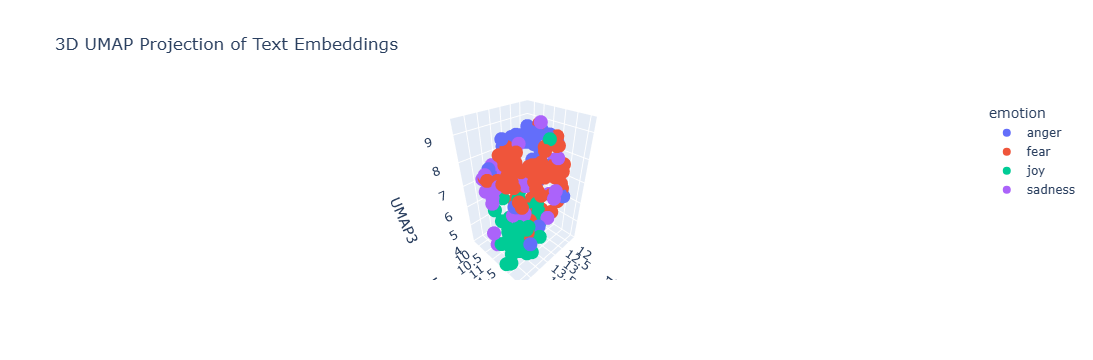

In [63]:
# Answer here
import pandas as pd
import numpy as np
import umap
import plotly.express as px

combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)
X_embeddings = np.array(combined_df['embeddings_values'].tolist())
reducer_3d = umap.UMAP(n_components=3,metric='cosine',random_state=28
)
embedding_3d = reducer_3d.fit_transform(X_embeddings)

df_plot_3d = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot_3d['emotion'] = combined_df['emotion']
df_plot_3d['intensity'] = combined_df['intensity']
df_plot_3d['text'] = combined_df['text']

fig_3d = px.scatter_3d(
    df_plot_3d,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color='emotion',
    hover_data=['text', 'intensity'],
    title='3D UMAP Projection of Text Embeddings'
)

fig_3d.show()

### Discuss the differences and similarities with the 2D graph.
1. Similarities
- **整體分群結構一致**：不論是 2D 或 3D，四種情緒（anger、fear、joy、sadness）都呈現出相似的聚集趨勢，彼此之間並沒有明顯被完全分離，表示語意空間本身是連續、重疊的。  
- **相同情緒仍有局部聚集效果**：兩個投影中，像 joy（綠色）與 sadness（紫色）的樣本依然有明顯的局部聚集，代表 embedding 本身成功捕捉語意相似度。  
- **類別間仍存在交錯**：fear 與 anger 的語意空間在兩種投影中都呈現交疊，反映情緒語料本身邊界模糊。

2. Difference
- **3D 垂直方向的分離較明顯**：在 3D UMAP 中，UMAP3 提供了額外的維度，使得某些類別（如 fear、anger）沿著高度方向更明顯的被拉開，這是 2D 中不容易看到的。  
- **2D 更扁平，類別更混合**：2D 投影較為密集，四種情緒水平展開，但仍明顯彼此重疊，表示 2D 空間沒辦法完整承載 embedding 之間的語意差異。  
- **3D 更有層次但不易靜態呈現**：3D 在互動式操作中能旋轉觀察不同方向，但乍看之下不太容理解，不適合放在靜態文件中展示。  



---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [41]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


In [42]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 726, 'output_tokens': 190}


The key challenges in realizing AGI's full potential stem from its fundamental requirements and the ethical considerations surrounding its development. These include:

*   **Learning from Diverse Data:** Unlike narrow AI, which is trained on structured data, AGI needs to learn from a wide variety of unstructured data sources.
*   **Computational Power:** The sheer amount of computational resources needed to process and learn from these vast and diverse datasets presents a significant hurdle.
*   **Ethical Concerns:** Developing AGI responsibly requires addressing critical ethical issues such as:
    *   **Bias and Fairness:** Ensuring algorithms are unbiased and treat everyone equally by training on diverse datasets and continuously monitoring performance.
    *   **Privacy:** Prioritizing user data protection through robust privacy measures and transparent data usage policies.
    *   **Accountability:** Establishing clear guidelines and legal frameworks to determine responsibility for decisions made by AGI systems and address any harm caused.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [43]:
# Answer here
url="https://www.woofz.com/blog/how-to-take-care-of-a-dog/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="How should I properly take care of my dog’s teeth?", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 713, 'output_tokens': 90}


To properly take care of your dog's teeth and oral hygiene, you should:

*   **Schedule regular veterinary checkups:** This helps prevent dental issues or allows for early intervention if problems arise.
*   **Follow your vet's professional dental hygiene suggestions:** This includes brushing your dog's teeth regularly.
*   **Consider dry kibble for dogs prone to plaque:** This can help prevent plaque from accumulating on their teeth.

### Discuss how good the question was answered by the model, if the model missed important information related to your question
我選擇一個有關狗狗照護的網站作為 database, 並問了 How should I properly take care of my dog’s teeth? 這個問題的答案可以在原文第 12 節 Dental care 找到答案
1. 模型成功精準抓取原文重點
- 定期帶狗狗做獸醫檢查
- 按照獸醫建議定期刷牙
- 若狗狗容易堆積牙菌斑，可選擇乾飼料（dry kibble）

2. 模型沒有添加不存在於文章中的資訊。
3. 模型抓住重點，並以條列式呈現資訊，讓用戶很容易找到答案。

整體而言，我覺得模型的回答很好，找到了正確答案，也沒有加油添醋無中生有，呈現資訊的方式甚至比原文更清晰易讀。

### Display a screenshot of the real answer in the webpage.
![Screenshot of the webpage – Dental care section](https://hackmd.io/_uploads/HyciaULbWg.png)

---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [48]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text 
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)
    
    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|██████████████████████████████          | 15/20 [00:10<00:03,  1.50it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.28 seconds.


Processing samples for emotion: fear...:  50%|████████████████████▌                    | 10/20 [00:07<00:07,  1.33it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.97 seconds.


Processing samples for emotion: joy...:  25%|██████████▊                                | 5/20 [00:04<00:12,  1.17it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.16 seconds.


Processing samples for emotion: sadness...:   0%|                                               | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 50.13 seconds.


Processing samples for emotion: sadness...:  75%|████████████████████████████▌         | 15/20 [01:00<00:04,  1.18it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.14 seconds.


Processing samples for emotion: sadness...: 100%|██████████████████████████████████████| 20/20 [01:53<00:00,  5.70s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 52.50%
              precision    recall  f1-score   support

       anger       0.58      0.55      0.56        20
        fear       0.86      0.30      0.44        20
         joy       0.47      0.85      0.61        20
     sadness       0.44      0.40      0.42        20

    accuracy                           0.53        80
   macro avg       0.59      0.53      0.51        80
weighted avg       0.59      0.53      0.51        80



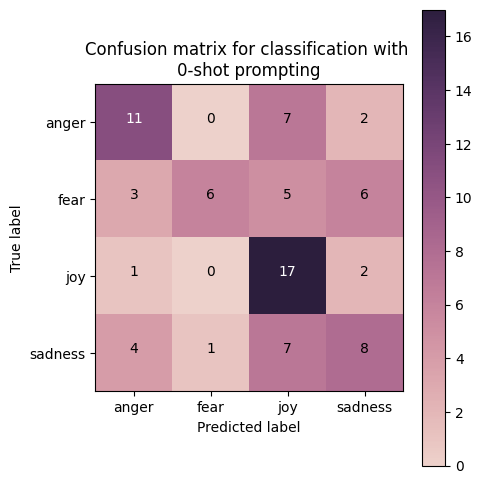

In [49]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: @WatcherDev @WarcraftDevs put so much artefact points into fury and cant raid... literally wasted 1 month of my life! Thanks blizzard
Class: anger

Text: If you think you're good to go already, don't worry about it.
Class: fear

Text: @__Dayo yall dont feel bad.. you are rejoicing... it is what itnis... its always #ColtsNation even when we have 6th string DBs playing 😔😔
Class: joy

Text: so fucking sad when the person you love doesn't try fighting for your happiness, when you'd do anything for them.
Class: sadness




Processing samples for emotion: anger...:  75%|██████████████████████████████          | 15/20 [00:10<00:03,  1.43it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.14 seconds.


Processing samples for emotion: fear...:  50%|████████████████████▌                    | 10/20 [00:06<00:06,  1.47it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.79 seconds.


Processing samples for emotion: joy...:  25%|██████████▊                                | 5/20 [00:03<00:09,  1.63it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.96 seconds.


Processing samples for emotion: sadness...:   0%|                                               | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.80 seconds.


Processing samples for emotion: sadness...:  75%|████████████████████████████▌         | 15/20 [01:00<00:04,  1.20it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.16 seconds.


Processing samples for emotion: sadness...: 100%|██████████████████████████████████████| 20/20 [01:52<00:00,  5.62s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 61.25%
              precision    recall  f1-score   support

       anger       0.71      0.50      0.59        20
        fear       0.77      0.50      0.61        20
         joy       0.50      0.90      0.64        20
     sadness       0.65      0.55      0.59        20

    accuracy                           0.61        80
   macro avg       0.66      0.61      0.61        80
weighted avg       0.66      0.61      0.61        80



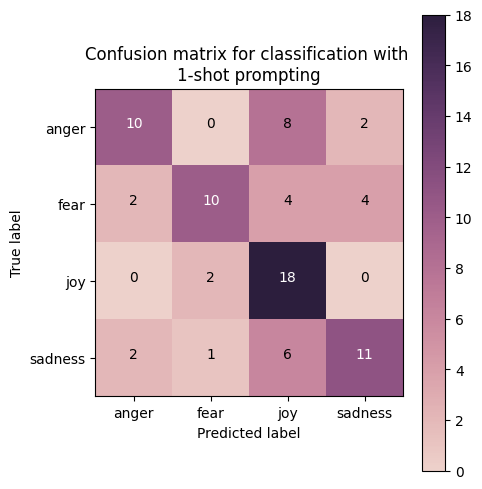

In [51]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: @WatcherDev @WarcraftDevs put so much artefact points into fury and cant raid... literally wasted 1 month of my life! Thanks blizzard
Class: anger

Text: my momma irritate me asking all these questions like gone 😤
Class: anger

Text: .@RepDelBene: 'Today's proceedings and the entire process is an insult to our constituents.'
Class: anger

Text: @warFarePower dip it in boiling water
Class: anger

Text: @ThomsonCares Sam- yes we have! Not helpful at all! We need this sorting ASAP! You keep promising stuff that doesn't happen!!!! 
Class: anger

Text: If you think you're good to go already, don't worry about it.
Class: fear

Text: @smb_ryan @Kamper10 I couldn't care less about #GOTHAM. I haven't watched it since the mid point of season 1. 
Class: fear

Text: @megynkelly We should be ignoring th

Processing samples for emotion: anger...:  75%|██████████████████████████████          | 15/20 [00:12<00:03,  1.31it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.61 seconds.


Processing samples for emotion: fear...:  50%|████████████████████▌                    | 10/20 [00:08<00:08,  1.15it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.99 seconds.


Processing samples for emotion: joy...:  25%|██████████▊                                | 5/20 [00:03<00:10,  1.43it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.76 seconds.


Processing samples for emotion: sadness...:   0%|                                               | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.94 seconds.


Processing samples for emotion: sadness...:  75%|████████████████████████████▌         | 15/20 [01:00<00:04,  1.13it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.61 seconds.


Processing samples for emotion: sadness...: 100%|██████████████████████████████████████| 20/20 [01:52<00:00,  5.61s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 60.00%
              precision    recall  f1-score   support

       anger       0.79      0.55      0.65        20
        fear       0.71      0.50      0.59        20
         joy       0.53      0.80      0.64        20
     sadness       0.50      0.55      0.52        20

    accuracy                           0.60        80
   macro avg       0.63      0.60      0.60        80
weighted avg       0.63      0.60      0.60        80



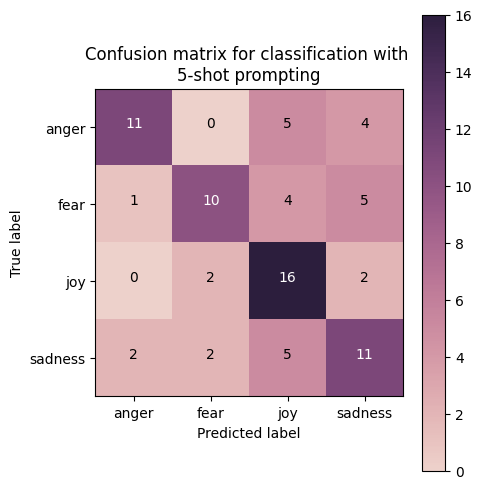

In [50]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

### Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.
1. **整體表現比較**  
  Zero-shot 的整體準確率約 **52.5%**，明顯低於 1-shot 的 **61.25%** 以及 5-shot 的 **60%**。在沒有example 的情況下，模型較難精準掌握四種情緒的分類方式；而加入示範後，模型能更好的掌握資訊
2. **1-shot 的表現提升最明顯**  
  1-shot 在 precision、recall、F1-score 上幾乎都比 zero-shot 好。尤其是 joy 與 sadness 的 recall 顯著上升，使整體準確率提升近 9%。而且在 1-shot 表現中，各情緒的 precision 也較平均，顯示模型沒有只學會其中一種情緒。雖然 5-shot 的表現（60%）略高於 zero-shot，但卻沒有超越 1-shot。部分情緒如 joy 的結果與 1-shot 相近，表示在這個任務中提供更多示範並不一定帶來更好的表現，可能因為示範的格式相似、資訊同質性高，使模型獲得的額外訊息有限。
3. **情緒分類細節**  
  Zero-shot 中 fear 的 recall 表現很低（0.30），代表模型不太了解這種情緒對應到的詞彙有哪些；加入示範後，fear 的 recall 在 1-shot 與 5-shot 均提升至 0.50，表示 example 確實給模型額外的資訊，讓模型更有效的捕捉語意
    另外，在三種設定（zero-shot、1-shot、5-shot）中，**joy 的 precision 都比 recall 低**，這代表模型在判斷 joy 時，**容易把其他情緒錯誤歸類成 joy**。推測是因為joy 的用詞較廣泛多樣，邊界不明確，模型容易把帶有正面語氣或較溫和的敘述都歸入 joy。

---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [53]:
# Answer here
df0 = pd.read_csv("results/llm_classification_results/results_samples_20_shots_0.csv")
df1 = pd.read_csv("results/llm_classification_results/results_samples_20_shots_1.csv")
df5 = pd.read_csv("results/llm_classification_results/results_samples_20_shots_5.csv")

In [63]:
df0[10:20]

,text,true_emotion,predicted_emotion
10,It's the most magical time of the year......Xm...,anger,anger
11,I think our defense here at USC is playing wel...,anger,joy
12,@IllinoisLoyalty that Rutgers game was an abom...,anger,anger
13,Everybody talking about 'the first day of fall...,anger,joy
14,@FluDino Event started! everyone is getting re...,anger,joy
15,"Why to have vanity sizes?Now sizes S,XS(evenXX...",anger,anger
16,Just joined #pottermore and was sorted into HU...,anger,anger
17,@TrueAggieFan oh so that's where Brian was! Wh...,anger,anger
18,@huwellwell One chosen by the CLP members! MP ...,anger,anger
19,@RevTrevK @Wolfman93011 @Daraidernation @EROCK...,anger,anger


In [64]:
df1[10:20]

,text,true_emotion,predicted_emotion
10,It's the most magical time of the year......Xm...,anger,anger
11,I think our defense here at USC is playing wel...,anger,joy
12,@IllinoisLoyalty that Rutgers game was an abom...,anger,anger
13,Everybody talking about 'the first day of fall...,anger,joy
14,@FluDino Event started! everyone is getting re...,anger,joy
15,"Why to have vanity sizes?Now sizes S,XS(evenXX...",anger,anger
16,Just joined #pottermore and was sorted into HU...,anger,anger
17,@TrueAggieFan oh so that's where Brian was! Wh...,anger,joy
18,@huwellwell One chosen by the CLP members! MP ...,anger,anger
19,@RevTrevK @Wolfman93011 @Daraidernation @EROCK...,anger,anger


In [65]:
df5[10:20]

,text,true_emotion,predicted_emotion
10,It's the most magical time of the year......Xm...,anger,anger
11,I think our defense here at USC is playing wel...,anger,joy
12,@IllinoisLoyalty that Rutgers game was an abom...,anger,anger
13,Everybody talking about 'the first day of fall...,anger,sadness
14,@FluDino Event started! everyone is getting re...,anger,joy
15,"Why to have vanity sizes?Now sizes S,XS(evenXX...",anger,anger
16,Just joined #pottermore and was sorted into HU...,anger,anger
17,@TrueAggieFan oh so that's where Brian was! Wh...,anger,joy
18,@huwellwell One chosen by the CLP members! MP ...,anger,anger
19,@RevTrevK @Wolfman93011 @Daraidernation @EROCK...,anger,sadness


In [57]:
print(df5['text'][0])

@fluffysoftlouis no no. I insist that you give me your best insult first


In [59]:
print(df5['text'][1])

Sorry guys I have absolutely no idea what time i'll be on cam tomorrow but will keep you posted. 


In [66]:
print(df5['text'][19])

@RevTrevK @Wolfman93011 @Daraidernation @EROCKhd Take 2k out of it the numbers on madden are low and have dropped and people are unhappy


###  text classification improves with more examples (pred emotion is right with examples)
text = @fluffysoftlouis no no. I insist that you give me your best insult first
在這個 text 中，模型在 zero-shot 與 1-shot 都把句子判為 joy，但在 5-shot 後成功辨識為 anger，表示示範對模型有明顯的引導效果。模型不再只依賴表面詞彙 (像是 best)，而是學會辨識語氣、上下文與隱含情緒。

### cases where it does not improve (pred emotion always wrong) 
text = Sorry guys I have absolutely no idea what time i'll be on cam tomorrow but will keep you posted.
在這個 text 中，模型在 zero-shot、1-shot、5-shot 中都將句子錯誤分類為 sadness，但正確 tag 應為 anger，表示模型未能掌握詞彙背後情緒。這個句子語氣克制甚至有點諷刺、用詞中性，沒有生氣時常見的激烈用字，使模型容易誤判為悲傷。

###  cases where the classification got worse with more examples (pred emotion goes from right to wrong with examples)
text = @RevTrevK @Wolfman93011 @Daraidernation @EROCKhd Take 2k out of it the numbers on madden are low and have dropped and people are unhappy
在這個 text 中，模型在 zero-shot 與 1-shot 都正確將句子分類為 anger，但在 5-shot 卻判為 sadness，表示 example 數增加反而造成干擾。可能是 5 個 example 中與這具句相近的用詞語氣被分到 sadness，使模型的決策邏輯受到影響。

---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---